# Revenue Analysis by Country and City:

- Objective: Identify which countries and cities generate the highest revenue.
- Approach: Aggregate the revenue by country and city, handling different currencies and undefined values.

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [221]:
df = pd.read_csv('conversions.csv')

In [222]:
df.columns.tolist()

['actionId',
 'afprice',
 'browser',
 'city',
 'country',
 'currency',
 'date',
 'device',
 'goal',
 'goalValue',
 'ip',
 'offer_title',
 'os',
 'revenue',
 'status',
 'sub1']

In [223]:
select_cols = df[['city', 'country', 'date', 'revenue', 'currency', 'offer_title', 'goal']]
select_cols

,city,country,date,revenue,currency,offer_title,goal
0,Heidenau,DE,8/22/2024 3:01,0.0009,USD,Nexo - CPA,Interest
1,Singapore,SG,8/21/2024 13:35,0.3125,SGD,Shopee SG - CPS,Old User
2,Singapore,SG,8/21/2024 13:35,0.0596,SGD,Shopee SG - CPS,Old User
3,Singapore,SG,8/20/2024 13:34,0.4700,SGD,Shopee SG - CPS,Old User
4,Singapore,SG,8/20/2024 13:34,0.0960,SGD,Shopee SG - CPS,Old User
...,...,...,...,...,...,...,...
95,Heidenau,DE,8/6/2024 2:52,0.0009,USD,Nexo - CPA,Interest
96,Singapore,SG,8/5/2024 14:06,0.5472,SGD,Shopee SG - CPS,Old User
97,Singapore,SG,8/5/2024 14:06,0.0072,SGD,Shopee SG - CPS,Old User
98,Singapore,SG,8/5/2024 14:06,0.2139,SGD,Shopee SG - CPS,Old User


In [224]:
select_cols['Date'] = pd.to_datetime(select_cols['date'], errors = 'coerce').dt.date
select_cols['Time'] = pd.to_datetime(select_cols['date'], errors = 'coerce').dt.time
select_cols

,city,country,date,revenue,currency,offer_title,goal,Date,Time
0,Heidenau,DE,8/22/2024 3:01,0.0009,USD,Nexo - CPA,Interest,2024-08-22,03:01:00
1,Singapore,SG,8/21/2024 13:35,0.3125,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
2,Singapore,SG,8/21/2024 13:35,0.0596,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
3,Singapore,SG,8/20/2024 13:34,0.4700,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00
4,Singapore,SG,8/20/2024 13:34,0.0960,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00
...,...,...,...,...,...,...,...,...,...
95,Heidenau,DE,8/6/2024 2:52,0.0009,USD,Nexo - CPA,Interest,2024-08-06,02:52:00
96,Singapore,SG,8/5/2024 14:06,0.5472,SGD,Shopee SG - CPS,Old User,2024-08-05,14:06:00
97,Singapore,SG,8/5/2024 14:06,0.0072,SGD,Shopee SG - CPS,Old User,2024-08-05,14:06:00
98,Singapore,SG,8/5/2024 14:06,0.2139,SGD,Shopee SG - CPS,Old User,2024-08-05,14:06:00


In [225]:
import warnings
warnings.filterwarnings('ignore')
# select_cols[['revenue_amount', 'revenue_currency']] = select_cols['revenue'].str.split(' ', expand=True)
select_cols['date'] = pd.to_datetime(select_cols['date'], errors = 'coerce').dt.date
# select_cols_drop = select_cols.drop(columns=['revenue', 'revenue_currency'])
select_cols.head()

,city,country,date,revenue,currency,offer_title,goal,Date,Time
0,Heidenau,DE,2024-08-22,0.0009,USD,Nexo - CPA,Interest,2024-08-22,03:01:00
1,Singapore,SG,2024-08-21,0.3125,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
2,Singapore,SG,2024-08-21,0.0596,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
3,Singapore,SG,2024-08-20,0.4700,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00
4,Singapore,SG,2024-08-20,0.0960,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00


In [226]:
select_cols.isna().sum()

city           0
country        0
date           0
revenue        0
currency       0
offer_title    0
goal           0
Date           0
Time           0
dtype: int64

In [227]:
select_cols['currency'].value_counts().reset_index(name='count')

,index,count
0,SGD,67
1,USD,33


In [228]:
# Ensure that revenue_amount is converted to a numeric type
USD_select_cols = select_cols[select_cols['currency'] == "USD"].copy()

# Convert revenue_amount to numeric, ensuring that any non-numeric values are handled
USD_select_cols['revenue'] = pd.to_numeric(USD_select_cols['revenue'], errors='coerce')

# Now perform the multiplication
USD_select_cols['revenue'] = USD_select_cols['revenue'] * 83.94
USD_select_cols['currency'] = USD_select_cols['currency'].replace("USD", "INR")

# Display the updated DataFrame
USD_select_cols.head()


,city,country,date,revenue,currency,offer_title,goal,Date,Time
0,Heidenau,DE,2024-08-22,0.075546,INR,Nexo - CPA,Interest,2024-08-22,03:01:00
9,Heidenau,DE,2024-08-20,0.075546,INR,Nexo - CPA,Interest,2024-08-20,02:54:00
11,Aurora,US,2024-08-19,31.720926,INR,Redbubble - CPS,Default,2024-08-19,02:31:00
12,Molln,DE,2024-08-19,9.006762,INR,Redbubble - CPS,Default,2024-08-19,00:54:00
13,Lubon,PL,2024-08-18,1.301070,INR,Nexo - CPA,Exchange,2024-08-18,21:52:00


In [229]:
SGD_select_cols = select_cols[select_cols['currency'] == "SGD"]
SGD_select_cols.dtypes


city            object
country         object
date            object
revenue        float64
currency        object
offer_title     object
goal            object
Date            object
Time            object
dtype: object

In [230]:
SGD_select_cols['revenue'] = SGD_select_cols['revenue'] * 63.67
SGD_select_cols['currency'] = SGD_select_cols['currency'].replace("SGD", 'INR')
SGD_select_cols.head()

,city,country,date,revenue,currency,offer_title,goal,Date,Time
1,Singapore,SG,2024-08-21,19.896875,INR,Shopee SG - CPS,Old User,2024-08-21,13:35:00
2,Singapore,SG,2024-08-21,3.794732,INR,Shopee SG - CPS,Old User,2024-08-21,13:35:00
3,Singapore,SG,2024-08-20,29.924900,INR,Shopee SG - CPS,Old User,2024-08-20,13:34:00
4,Singapore,SG,2024-08-20,6.112320,INR,Shopee SG - CPS,Old User,2024-08-20,13:34:00
5,Singapore,SG,2024-08-20,21.017467,INR,Shopee SG - CPS,Old User,2024-08-20,13:34:00


In [231]:
Concate = pd.concat([USD_select_cols, SGD_select_cols], ignore_index=True)

# Total Revenue in INR

In [232]:
np.ceil(Concate['revenue'].sum())

32275.0

In [233]:
Concate.groupby(['city', 'country', 'offer_title', 'goal']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")

,city,country,offer_title,goal,Total_Payout_By_City,Total_Payout_By_Country
6,Parana,AR,Nexo - CPA,Signups,0.000000,0.000000
2,Heidenau,DE,Nexo - CPA,Interest,1.133190,1.133190
3,Lubon,PL,Nexo - CPA,Exchange,6.345864,6.345864
4,Molln,DE,Redbubble - CPS,Default,9.006762,9.006762
5,Monrovia,US,Abebooks Global - CPS,Default,26.491464,26.491464
0,Aurora,US,Redbubble - CPS,Default,31.720926,31.720926
7,Port Clyde,US,Thriftbooks - CPS,Default,114.351462,114.351462
8,Singapore,SG,Shopee SG - CPS,Old User,1028.098591,1028.098591
1,Garden Grove,US,Shopify CPA,Default,31057.800000,31057.800000


In [234]:
select_cols.head()

,city,country,date,revenue,currency,offer_title,goal,Date,Time
0,Heidenau,DE,2024-08-22,0.0009,USD,Nexo - CPA,Interest,2024-08-22,03:01:00
1,Singapore,SG,2024-08-21,0.3125,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
2,Singapore,SG,2024-08-21,0.0596,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
3,Singapore,SG,2024-08-20,0.4700,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00
4,Singapore,SG,2024-08-20,0.0960,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00


In [235]:
Select_USD = select_cols[select_cols.currency == "USD"]
Select_USD.head()

,city,country,date,revenue,currency,offer_title,goal,Date,Time
0,Heidenau,DE,2024-08-22,0.0009,USD,Nexo - CPA,Interest,2024-08-22,03:01:00
9,Heidenau,DE,2024-08-20,0.0009,USD,Nexo - CPA,Interest,2024-08-20,02:54:00
11,Aurora,US,2024-08-19,0.3779,USD,Redbubble - CPS,Default,2024-08-19,02:31:00
12,Molln,DE,2024-08-19,0.1073,USD,Redbubble - CPS,Default,2024-08-19,00:54:00
13,Lubon,PL,2024-08-18,0.0155,USD,Nexo - CPA,Exchange,2024-08-18,21:52:00


In [236]:
Select_SGD = select_cols[select_cols.currency == "SGD"]
Select_SGD.head()

,city,country,date,revenue,currency,offer_title,goal,Date,Time
1,Singapore,SG,2024-08-21,0.3125,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
2,Singapore,SG,2024-08-21,0.0596,SGD,Shopee SG - CPS,Old User,2024-08-21,13:35:00
3,Singapore,SG,2024-08-20,0.4700,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00
4,Singapore,SG,2024-08-20,0.0960,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00
5,Singapore,SG,2024-08-20,0.3301,SGD,Shopee SG - CPS,Old User,2024-08-20,13:34:00


In [237]:
Select_USD.groupby(['city', 'country', 'currency']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")

,city,country,currency,Total_Payout_By_City,Total_Payout_By_Country
6,Parana,AR,USD,0.0000,0.0000
2,Heidenau,DE,USD,0.0135,0.0135
3,Lubon,PL,USD,0.0756,0.0756
4,Molln,DE,USD,0.1073,0.1073
5,Monrovia,US,USD,0.3156,0.3156
0,Aurora,US,USD,0.3779,0.3779
7,Port Clyde,US,USD,1.3623,1.3623
1,Garden Grove,US,USD,370.0000,370.0000


In [238]:
Select_SGD.groupby(['city', 'country', 'currency']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")

,city,country,currency,Total_Payout_By_City,Total_Payout_By_Country
0,Singapore,SG,SGD,16.1473,16.1473


# Revenue Analysis by Country and City:


In [239]:
Ans_payout = select_cols.groupby(['city', 'country', 'currency']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")
Ans_payout

,city,country,currency,Total_Payout_By_City,Total_Payout_By_Country
6,Parana,AR,USD,0.0000,0.0000
2,Heidenau,DE,USD,0.0135,0.0135
3,Lubon,PL,USD,0.0756,0.0756
4,Molln,DE,USD,0.1073,0.1073
5,Monrovia,US,USD,0.3156,0.3156
0,Aurora,US,USD,0.3779,0.3779
7,Port Clyde,US,USD,1.3623,1.3623
8,Singapore,SG,SGD,16.1473,16.1473
1,Garden Grove,US,USD,370.0000,370.0000


In [240]:
df_1 = Ans_payout[['city', 'Total_Payout_By_Country']]
df_1

,city,Total_Payout_By_Country
6,Parana,0.0000
2,Heidenau,0.0135
3,Lubon,0.0756
4,Molln,0.1073
5,Monrovia,0.3156
0,Aurora,0.3779
7,Port Clyde,1.3623
8,Singapore,16.1473
1,Garden Grove,370.0000


# Data Visualization City wise

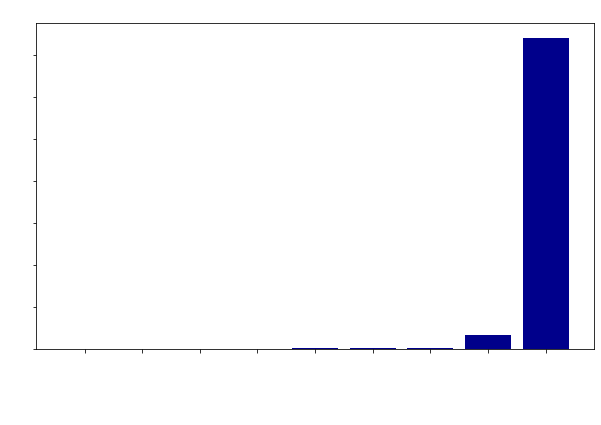

In [241]:
plt.figure(figsize=(10, 6))
plt.bar(df_1['city'], df_1['Total_Payout_By_Country'], color='darkblue')
plt.title('Total Payout by City', color = 'white', weight = 'bold')
plt.xticks(rotation=45, color = 'white', weight = 'bold')
plt.yticks(rotation=45, color = 'white', weight = 'bold')
plt.show()

# Country wise

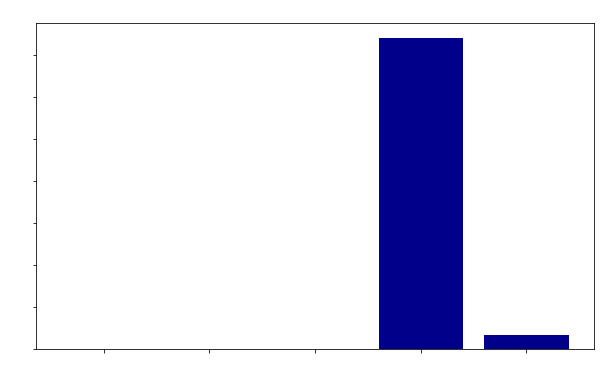

In [242]:
plt.figure(figsize=(10, 6))
plt.bar(Ans_payout['country'], Ans_payout['Total_Payout_By_Country'], color='darkblue')
plt.title('Total Payout by City', color = 'white', weight = 'bold')
plt.xticks(rotation=45, color = 'white', weight = 'bold')
plt.yticks(rotation=45, color = 'white', weight = 'bold')
plt.show()

# Currency vs Total_Payout_By_Country

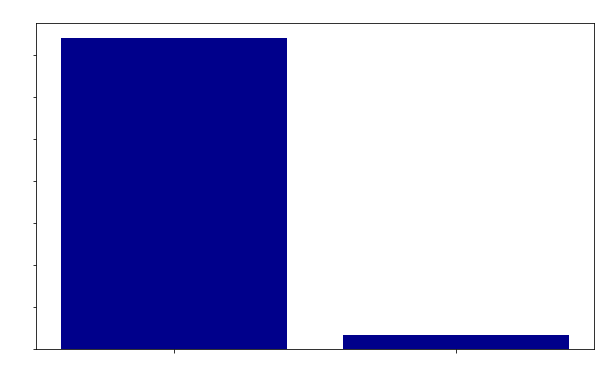

In [243]:
plt.figure(figsize=(10, 6))
plt.bar(Ans_payout['currency'], Ans_payout['Total_Payout_By_Country'], color='darkblue')
plt.title('Total Payout by City', color = 'white', weight = 'bold')
plt.xticks(rotation=45, color = 'white', weight = 'bold')
plt.yticks(rotation=45, color = 'white', weight = 'bold')
plt.show()

In [244]:
df.head()

,actionId,afprice,browser,city,country,currency,date,device,goal,goalValue,ip,offer_title,os,revenue,status,sub1
0,12544.6077.615401,undefined USD,Chrome 120,Heidenau,DE,USD,8/22/2024 3:01,desktop,Interest,3,83.135.9.XXX,Nexo - CPA,Windows 10,0.0009,confirmed,tabm
1,240820S38M506H_24975638051_1,undefined SGD,Chrome 127,Singapore,SG,SGD,8/21/2024 13:35,desktop,Old User,1,116.87.113.55,Shopee SG - CPS,Windows 10,0.3125,confirmed,tabm
2,240820R6MVJ4B7_19469898036_1,undefined SGD,Chrome 127,Singapore,SG,SGD,8/21/2024 13:35,desktop,Old User,1,118.189.184.75,Shopee SG - CPS,Windows 10,0.0596,confirmed,tabm
3,240819MC633Y6H_20471094888_1,undefined SGD,Chrome 127,Singapore,SG,SGD,8/20/2024 13:34,desktop,Old User,1,103.107.198.141,Shopee SG - CPS,Windows 10,0.4700,confirmed,tabm
4,240819PAEHW6KC_2275895801_1,undefined SGD,Chrome 127,Singapore,SG,SGD,8/20/2024 13:34,desktop,Old User,1,66.228.7.29,Shopee SG - CPS,Windows 10,0.0960,confirmed,-


In [245]:
data = df[['browser', 'device', 'ip', 'os', 'status', 'revenue']]
data.head()

,browser,device,ip,os,status,revenue
0,Chrome 120,desktop,83.135.9.XXX,Windows 10,confirmed,0.0009
1,Chrome 127,desktop,116.87.113.55,Windows 10,confirmed,0.3125
2,Chrome 127,desktop,118.189.184.75,Windows 10,confirmed,0.0596
3,Chrome 127,desktop,103.107.198.141,Windows 10,confirmed,0.4700
4,Chrome 127,desktop,66.228.7.29,Windows 10,confirmed,0.0960


In [246]:
data['status'].value_counts().reset_index(name='count')

,index,count
0,confirmed,95
1,pending,5


# Device and Browser Impact on Conversions:

- Objective: Examine the effect of device type and browser on conversion rates.
- Approach: Compare the number of confirmed conversions and revenue across different devices and browsers.

In [247]:
data.groupby(['browser', 'device', 'ip', 'os', 'status']).agg(Total_revenue = ("revenue", 'sum')).reset_index().sort_values(by = "Total_revenue", ascending=False)

,browser,device,ip,os,status,Total_revenue
1,Chrome 126,desktop,172.56.191.10,Windows 10,pending,330.0000
2,Chrome 126,desktop,172.56.191.155,Windows 10,pending,40.0000
4,Chrome 127,desktop,101.78.73.92,Windows 10,confirmed,4.6034
12,Chrome 127,desktop,118.189.184.75,Windows 10,confirmed,3.0142
10,Chrome 127,desktop,116.86.253.126,Windows 10,confirmed,2.9780
6,Chrome 127,desktop,103.252.201.162,Windows 10,confirmed,1.5479
19,Chrome 127,desktop,67.248.23.249,macOS 10.15.7,confirmed,1.3623
13,Chrome 127,desktop,121.7.245.34,Windows 10,confirmed,1.0416
3,Chrome 127,desktop,101.127.7.146,Windows 10,confirmed,0.7178
18,Chrome 127,desktop,66.228.7.29,Windows 10,confirmed,0.5439


In [248]:
# Filter the data for confirmed conversions
confirmed_conversions = df[df['status'] == 'confirmed'].copy()

# Group by device and browser, then aggregate the number of conversions and total revenue
device_browser_impact = confirmed_conversions.groupby(['device', 'browser']).agg(
    conversions=('actionId', 'count'),
    total_revenue=('revenue', 'sum')
).reset_index()

# Display the aggregated results
device_browser_impact.head()


,device,browser,conversions,total_revenue
0,desktop,Chrome 120,15,0.0135
1,desktop,Chrome 127,70,18.2031
2,desktop,Edge (Chromium) for Windows 120,8,0.0756
3,desktop,Opera One 112,2,0.1073


In [249]:
df.head(1)

,actionId,afprice,browser,city,country,currency,date,device,goal,goalValue,ip,offer_title,os,revenue,status,sub1
0,12544.6077.615401,undefined USD,Chrome 120,Heidenau,DE,USD,8/22/2024 3:01,desktop,Interest,3,83.135.9.XXX,Nexo - CPA,Windows 10,0.0009,confirmed,tabm


In [250]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce').dt.date
df.head(1)

,actionId,afprice,browser,city,country,currency,date,device,goal,goalValue,ip,offer_title,os,revenue,status,sub1
0,12544.6077.615401,undefined USD,Chrome 120,Heidenau,DE,USD,2024-08-22,desktop,Interest,3,83.135.9.XXX,Nexo - CPA,Windows 10,0.0009,confirmed,tabm


In [251]:
dataset = df[['date', 'revenue']]

# Temporal Patterns in Conversions:

- Objective: Identify patterns in conversion activity over time.
- Approach: Analyze conversion volume and revenue by hour, day, and month to find peak times.

In [252]:
Demo = dataset.groupby(['date', 'revenue']).agg(Total_Payout = ("revenue", "sum"),
  
                                       Payout_Count = ("revenue", "count")).reset_index().sort_values(by= "date",ascending=True).iloc[0:30]
Demo

,date,revenue,Total_Payout,Payout_Count
0,2024-08-05,0.0009,0.0009,1
1,2024-08-05,0.0072,0.0072,1
2,2024-08-05,0.2139,0.2139,1
3,2024-08-05,0.5472,0.5472,1
4,2024-08-06,0.0000,0.0000,4
5,2024-08-06,0.0009,0.0009,1
6,2024-08-06,0.0193,0.0386,2
7,2024-08-06,0.0876,0.0876,1
8,2024-08-06,0.1236,0.1236,1
9,2024-08-06,0.4680,0.4680,1


In [253]:
Ans = dataset['date'].value_counts().reset_index(name='count').sort_values(by='index')
Ans

,index,count
9,2024-08-05,4
3,2024-08-06,10
14,2024-08-07,2
8,2024-08-08,5
0,2024-08-09,14
15,2024-08-10,1
1,2024-08-11,12
7,2024-08-12,5
6,2024-08-13,6
10,2024-08-14,4


# Data Visualisation Date Vs count

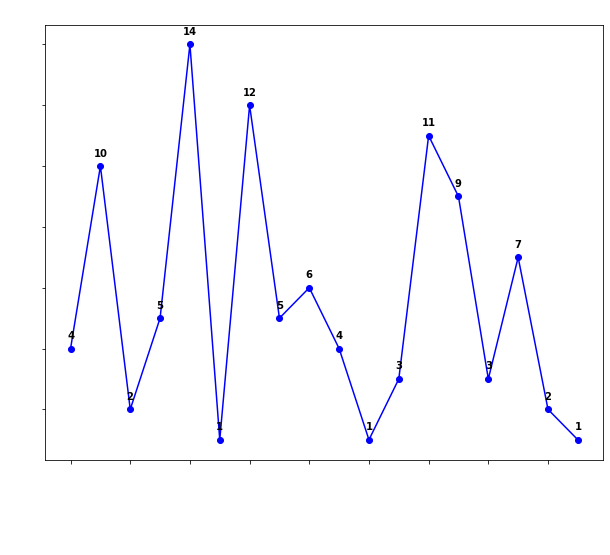

In [254]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert 'index' column to datetime if necessary
Ans['index'] = pd.to_datetime(Ans['index'])

# Plot a line graph
plt.figure(figsize=(10, 8))
plt.plot(Ans['index'], Ans['count'], marker='o', linestyle='-', color='blue')

# Add data labels
for i in range(len(Ans)):
    plt.annotate(f"{Ans['count'][i]}", (Ans['index'][i], Ans['count'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', weight = 'bold')

# Add titles and labels
plt.title('Index vs Count', weight='bold', fontsize=15, color = 'white')
plt.xlabel('Index', fontsize=12, color = 'white', weight = 'bold')
plt.ylabel('Count', fontsize=12, color = 'white', weight = 'bold')
plt.xticks(rotation = 90, color = 'white', weight = 'bold')
plt.yticks(color = 'white', weight = 'bold')
# Show the plot
plt.show()


# Data Visualisation Date vs count

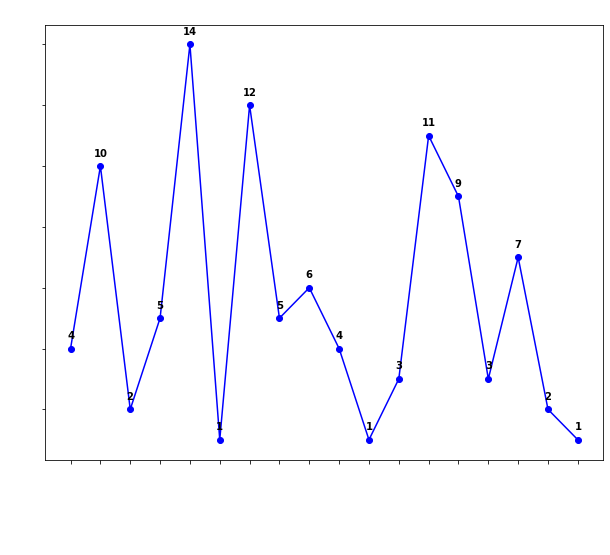

In [255]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'index' column to datetime if necessary
Ans['index'] = pd.to_datetime(Ans['index'])

# Plot a line graph
plt.figure(figsize=(10, 8))
plt.plot(Ans['index'], Ans['count'], marker='o', linestyle='-', color='blue')

# Add data labels
for i in range(len(Ans)):
    plt.annotate(f"{Ans['count'][i]}", (Ans['index'][i], Ans['count'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', weight='bold')

# Add titles and labels
plt.title('Index vs Count', weight='bold', fontsize=15, color='white')
plt.xlabel('Index', fontsize=12, color='white', weight='bold')
plt.ylabel('Count', fontsize=12, color='white', weight='bold')

# Ensure all dates are shown on the x-axis
plt.xticks(Ans['index'], rotation=90, color='white', weight='bold')

plt.yticks(color='white', weight='bold')

# Show the plot
plt.show()


In [256]:
Conversion_Volume = df[df['status']=='confirmed'].copy()
Conversion_Volume.head(1)

,actionId,afprice,browser,city,country,currency,date,device,goal,goalValue,ip,offer_title,os,revenue,status,sub1
0,12544.6077.615401,undefined USD,Chrome 120,Heidenau,DE,USD,2024-08-22,desktop,Interest,3,83.135.9.XXX,Nexo - CPA,Windows 10,0.0009,confirmed,tabm


In [257]:
Maximum = Conversion_Volume.groupby(['date', 'currency']).agg(Payout = ("revenue", "sum"), 
Payout_count = ("revenue", "count")).reset_index().sort_values(by='date', ascending=True)
Maximum

,date,currency,Payout,Payout_count
0,2024-08-05,SGD,0.7683,3
1,2024-08-05,USD,0.0009,1
2,2024-08-06,SGD,0.7178,9
3,2024-08-06,USD,0.0009,1
4,2024-08-07,USD,0.0009,1
5,2024-08-08,USD,0.3195,3
6,2024-08-09,SGD,5.4024,11
7,2024-08-09,USD,0.0037,2
8,2024-08-10,USD,0.0009,1
9,2024-08-11,SGD,0.9352,11


In [258]:
df.head(1)

,actionId,afprice,browser,city,country,currency,date,device,goal,goalValue,ip,offer_title,os,revenue,status,sub1
0,12544.6077.615401,undefined USD,Chrome 120,Heidenau,DE,USD,2024-08-22,desktop,Interest,3,83.135.9.XXX,Nexo - CPA,Windows 10,0.0009,confirmed,tabm


# offer performance analysis

In [268]:
offer = df[['offer_title', 'revenue', 'status', 'currency']]
offer.head()

,offer_title,revenue,status,currency
0,Nexo - CPA,0.0009,confirmed,USD
1,Shopee SG - CPS,0.3125,confirmed,SGD
2,Shopee SG - CPS,0.0596,confirmed,SGD
3,Shopee SG - CPS,0.4700,confirmed,SGD
4,Shopee SG - CPS,0.0960,confirmed,SGD


In [269]:
Doffer = offer.groupby(['offer_title', 'status', 'currency']).agg(Total_Revenue = ("revenue", "sum"),
        Revenue_Count = ("revenue", "count")).reset_index().sort_values(by="status", ascending=False)
Doffer

,offer_title,status,currency,Total_Revenue,Revenue_Count
4,Shopify CPA,pending,USD,370.0000,5
0,Abebooks Global - CPS,confirmed,USD,0.3156,1
1,Nexo - CPA,confirmed,USD,0.0891,24
2,Redbubble - CPS,confirmed,USD,0.4852,2
3,Shopee SG - CPS,confirmed,SGD,16.1473,67
5,Thriftbooks - CPS,confirmed,USD,1.3623,1


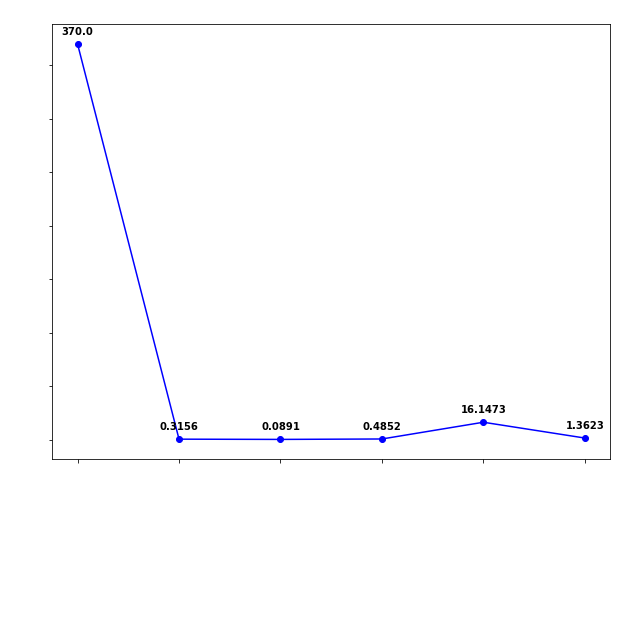

In [267]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 8))
plt.plot(Doffer['offer_title'], Doffer['Total_Revenue'], marker='o', linestyle='-', color='blue')

# Add data labels
for i in range(len(Doffer)):
    plt.annotate(f"{Doffer['Total_Revenue'][i]}", (Doffer['offer_title'][i], Doffer['Total_Revenue'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', weight='bold')

# Add titles and labels
plt.title('offer_title vs Total_Revenue', weight='bold', fontsize=15, color='white')
plt.xlabel('offer_title', fontsize=12, color='white', weight='bold')
plt.ylabel('Total_Revenue', fontsize=12, color='white', weight='bold')

# Ensure all dates are shown on the x-axis
plt.xticks(Doffer['offer_title'], rotation=90, color='white', weight='bold')

plt.yticks(color='white', weight='bold')

# Show the plot
plt.show()


In [274]:
df.head(2)

,actionId,afprice,browser,city,country,currency,date,device,goal,goalValue,ip,offer_title,os,revenue,status,sub1
0,12544.6077.615401,undefined USD,Chrome 120,Heidenau,DE,USD,2024-08-22,desktop,Interest,3,83.135.9.XXX,Nexo - CPA,Windows 10,0.0009,confirmed,tabm
1,240820S38M506H_24975638051_1,undefined SGD,Chrome 127,Singapore,SG,SGD,2024-08-21,desktop,Old User,1,116.87.113.55,Shopee SG - CPS,Windows 10,0.3125,confirmed,tabm


In [275]:
df[['goalValue', 'revenue']]

,goalValue,revenue
0,3,0.0009
1,1,0.3125
2,1,0.0596
3,1,0.4700
4,1,0.0960
...,...,...
95,3,0.0009
96,1,0.5472
97,1,0.0072
98,1,0.2139


       goal  avg_goal_value  avg_revenue  total_revenue  correlation
0   Default             1.0    41.351456       372.1631          NaN
1  Exchange             1.0     0.009450         0.0756          NaN
2  Interest             3.0     0.000900         0.0135          NaN
3  Old User             1.0     0.241004        16.1473          NaN
4   Signups             6.0     0.000000         0.0000          NaN


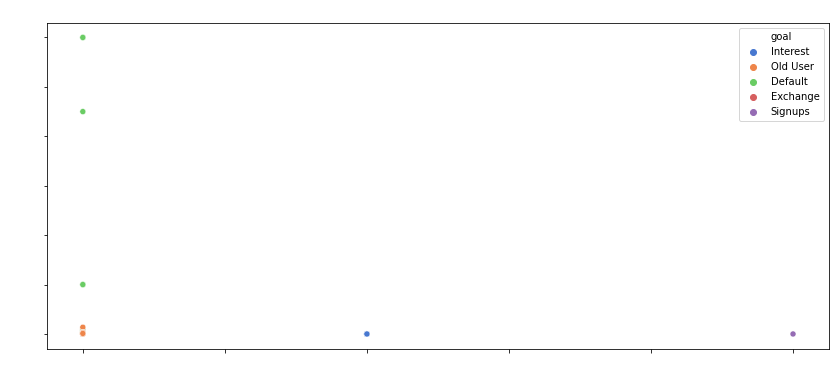

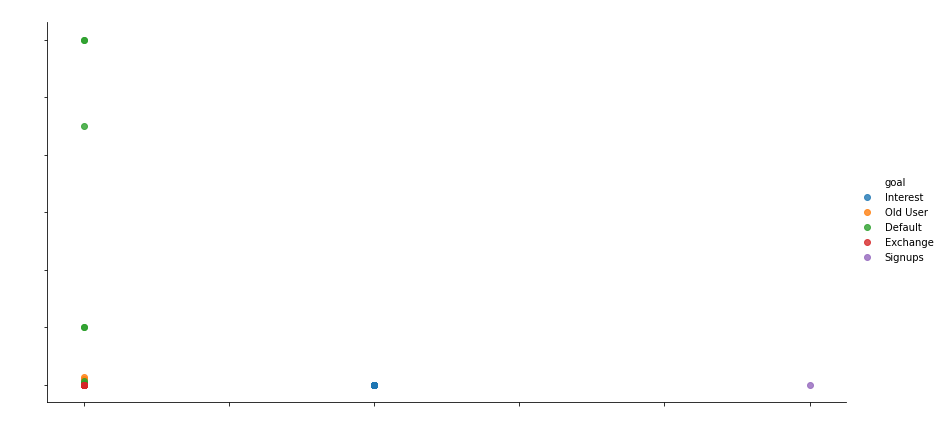

In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure goalValue and revenue_amount are numeric
df['goalValue'] = pd.to_numeric(df['goalValue'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Group by 'goal' and calculate relevant statistics
goal_performance = df.groupby('goal').agg(
    avg_goal_value=('goalValue', 'mean'),
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum'),
    correlation=('goalValue', lambda x: x.corr(df.loc[x.index, 'revenue']))
).reset_index()

# Display the goal performance table
print(goal_performance)

# Scatter plot to visualize the correlation between goalValue and revenue
plt.figure(figsize=(14, 6))
sns.scatterplot(x='goalValue', y='revenue', hue='goal', data=df, palette='muted')
plt.title('Goal Value vs Revenue Amount by Goal Type', color = 'white')
plt.xlabel('Goal Value', color = 'white')
plt.ylabel('Revenue Amount',color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.show()

# Show a regression line for each goal type
sns.lmplot(x='goalValue', y='revenue', hue='goal', data=df, aspect=2, height=6, ci=None)
plt.title('Correlation between Goal Value and Revenue by Goal Type',color = 'white')
plt.xlabel('Goal Value',color = 'white')
plt.ylabel('Revenue Amount',color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')

plt.show()
